In [77]:
!pip install pydotplus


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [78]:
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier , export_graphviz 
from IPython.display import Image, display

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score , confusion_matrix
import pydotplus

In [79]:
# Reading Carseats data
df=pd.read_csv("Carseats.csv")


# Recoding Sales as a binary variable : High
df['High']=df.Sales > 8
# Dropping Sales & Unnamed
df.drop(['Sales','Unnamed: 0'],axis=1,inplace=True)


# Recoding Urban,US as a binary variable : High
df['Urban']=df.Urban=='Yes'
df['US']=df.US=='Yes'


df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,True,True,True
1,111,48,16,260,83,Good,65,10,True,True,True
2,113,35,10,269,80,Medium,59,12,True,True,True
3,117,100,4,466,97,Medium,55,14,True,True,False
4,141,64,3,340,128,Bad,38,13,True,False,False


In [80]:
df.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [81]:
shelv_dict={
    'Bad':0,
    'Medium':1,
    'Good':2
}
df.ShelveLoc=df['ShelveLoc'].map(shelv_dict)

In [82]:
#Ordinal Encoding
#Have to check why this is not working when using categories=['Bad','Mdeium','Good']
#encoder=OrdinalEncoder()
#df.ShelveLoc=encoder.fit_transform(df['ShelveLoc'].values.reshape(-1,1))
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,0,42,17,True,True,True
1,111,48,16,260,83,2,65,10,True,True,True
2,113,35,10,269,80,1,59,12,True,True,True
3,117,100,4,466,97,1,55,14,True,True,False
4,141,64,3,340,128,0,38,13,True,False,False


In [83]:
y=df['High']
X=df.drop(['High'],axis=1)
X.head()
y.head()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [84]:
clf=DecisionTreeClassifier(min_samples_split=25)
est_tree=clf.fit(X,y)
#print(accuracy_score(clf.predict(X_test),y_test))

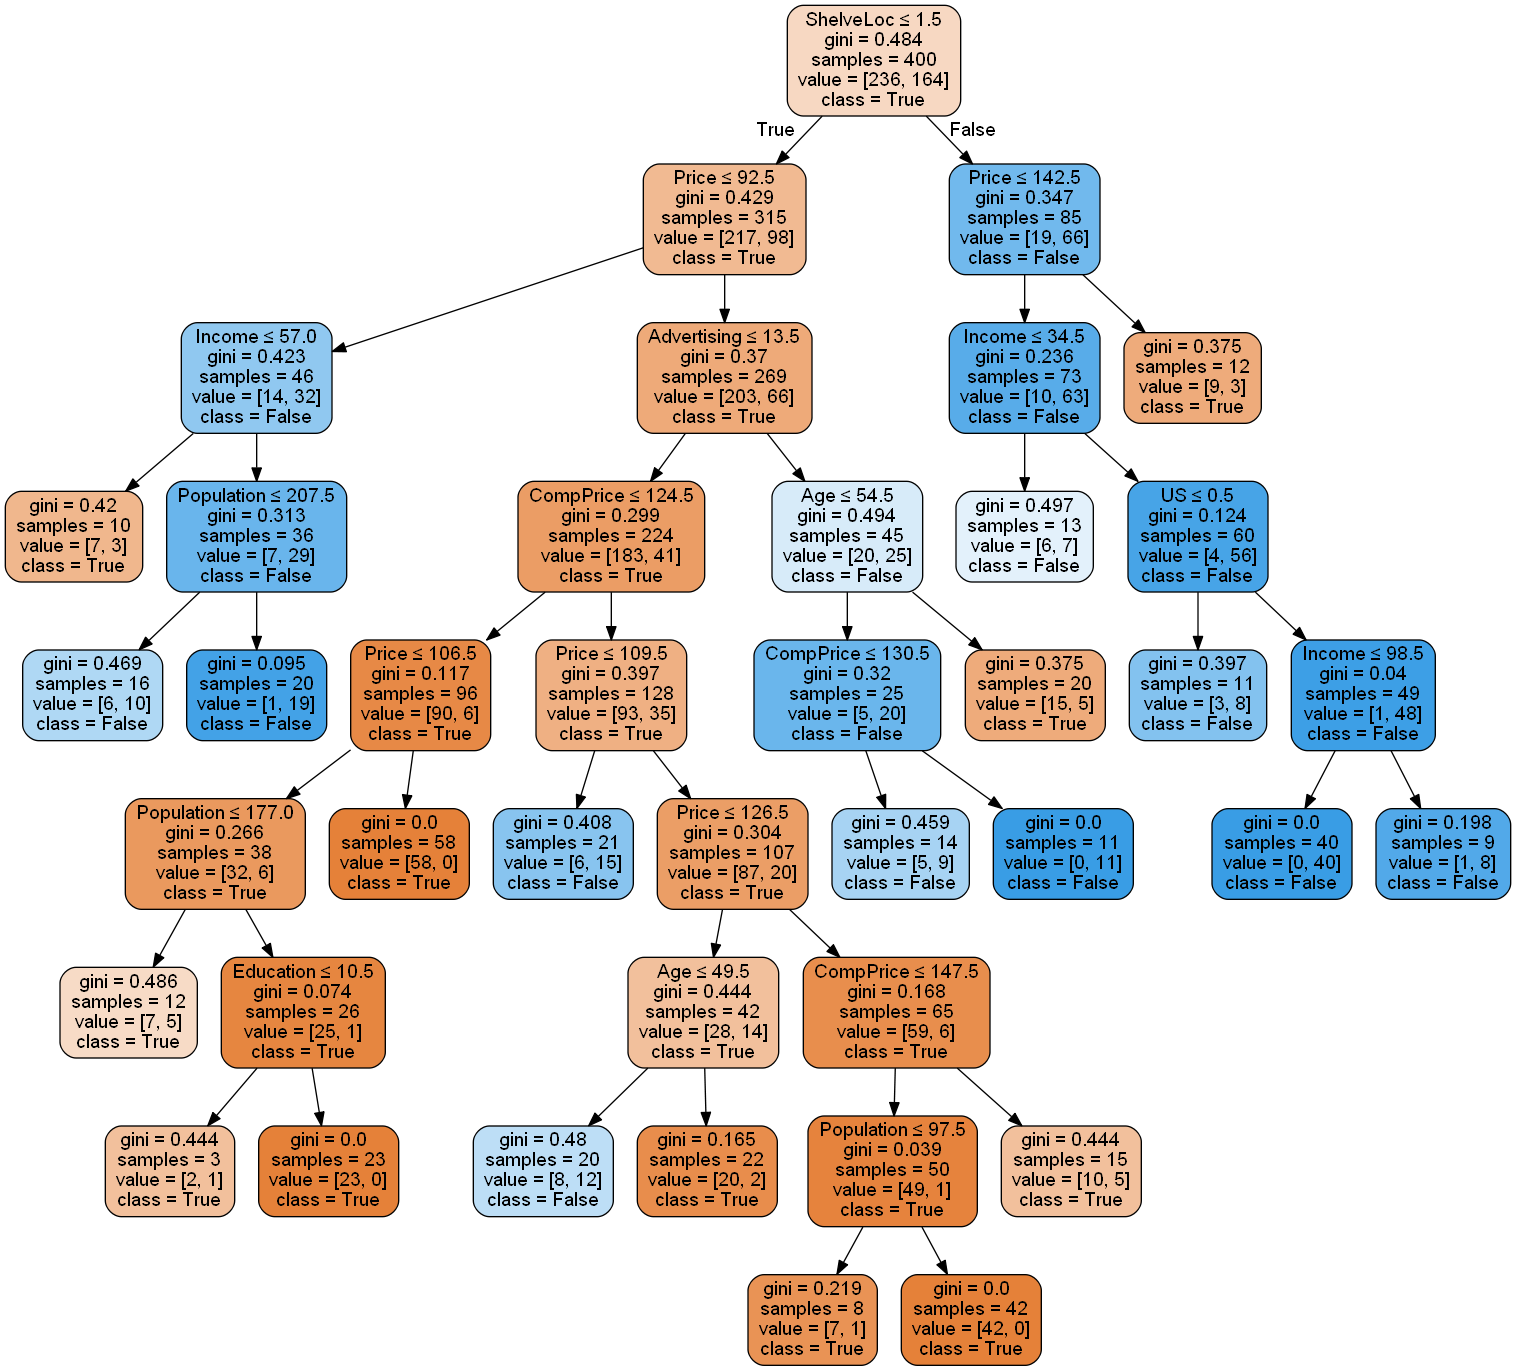

In [85]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
dot_data = export_graphviz(est_tree, out_file=None,feature_names=X.columns, 
                class_names=['True','False'],filled=True, rounded=True,  
                        special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())


In [86]:
feature_importance=est_tree.feature_importances_
pd.DataFrame(feature_importance,index=X.columns,columns=['Importance']).sort_values(by=['Importance'],ascending=False)
# In the book , the ShelveLocation is the most imp factor, need to revisit this to see why it differs

,Importance
Price,0.336778
ShelveLoc,0.260023
Age,0.108994
Advertising,0.093277
CompPrice,0.078197
Income,0.067391
Population,0.039791
US,0.010259
Education,0.005289
Urban,0.000000


In [87]:
# Estimating Training Error Rate
cm=confusion_matrix(y,est_tree.predict(X))
print("Training Error : {:.2f}".format((cm[0][1] + cm[1][0])/cm.sum()))

Training Error : 0.15


In [88]:
cm

array([[200,  36],
       [ 25, 139]], dtype=int64)

In [89]:
# Estimating Test Error Rate
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
cm_test=confusion_matrix(y_test,clf.predict(X_test))
print("Test Prediction : {:.2f}".format((cm_test[0][0] + cm_test[1][1])/cm_test.sum()))

Test Prediction : 0.78


In [90]:
cm_test

array([[55, 11],
       [16, 38]], dtype=int64)

In [91]:
# Pruning to improve the result
# Estimating Test Error Rate
clf=DecisionTreeClassifier(max_depth=8)
clf.fit(X_train,y_train)
cm_test=confusion_matrix(y_test,clf.predict(X_test))
print("Test Prediction : {:.2f}".format((cm_test[0][0] + cm_test[1][1])/cm_test.sum()))

Test Prediction : 0.80
